In [25]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad,trapz

In [13]:
# these two function determine the intensity probability function
def theta(y,k,phi0):
    return (np.cos(y*k*phi0)-1)*np.sqrt(-np.log(y))/y
def omega(y,k,phi0):
    return np.sin(y*k*phi0)*np.sqrt(-np.log(y))/y

In [14]:
phi_limit = 10
steps = 201
phi = np.linspace(0,phi_limit,steps)
d = phi_limit/steps

In [15]:
def theta_int(k,phi0):
    if hasattr(k,'__iter__'):
        return np.array([quad(theta,0,1,args=(kk,phi0))[0] for kk in k])
    else:
        return quad(theta,0,1,args=(k,phi0))[0]

def omega_int(k,phi0):
    if hasattr(k,'__iter__'):
        return np.array([quad(omega,0,1,args=(kk,phi0))[0] for kk in k])
    else:
        return quad(omega,0,1,args=(k,phi0))[0]        

In [16]:
def p_phi(k,phi,prefactor,phi0):
    return np.exp(prefactor*theta_int(k,phi0))*np.cos(k*phi-prefactor*omega_int(k,phi0))

In [17]:
prefactor = 1*np.pi/np.sqrt(2)
phi0=1.0
p_of_phi = np.array([quad(p_phi,0,20,args=(p,prefactor,phi0))[0] for p in phi])

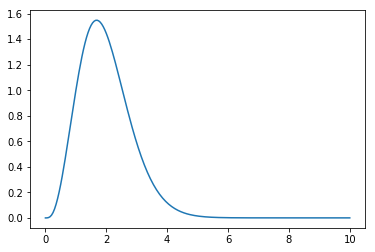

In [18]:
plt.plot(phi,p_of_phi)

In [26]:
# normalization
print(trapz(p_of_phi,dx=d)/np.pi)

0.9950232724198158


In [27]:
# first moment it should be (pi/2)^3/2 = 1.9687
print(trapz(p_of_phi*phi,dx=d)/np.pi)

1.958906680624992
